<img src="./logo_UTN_2.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 2
### Axel Nathanel Nahum


## Introduccion

En este notebook encontraremos un analisis de un filtro activo $Pasa-Bajos$ de segundo orden, donde se analizara la respuesta en frecuencia (Modulo y Fase), ademas de ver los calculos necesarios para obtener la trasferencia de este filtro. Ademas se realizara un analisis sobre el filtro, graficos, entre otros. El circuito a analizar contiene diversos componentes como amplificadores operacionales, capacitores y resistencias. Este mismo corresponde a un $filtro activo$.

## Resolucion

In [1]:
from IPython.display import IFrame
IFrame("./Resolucion_2.pdf", width=900, height=1000)

## Respuesta en frecuencia (Modulo y Fase)

In [5]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

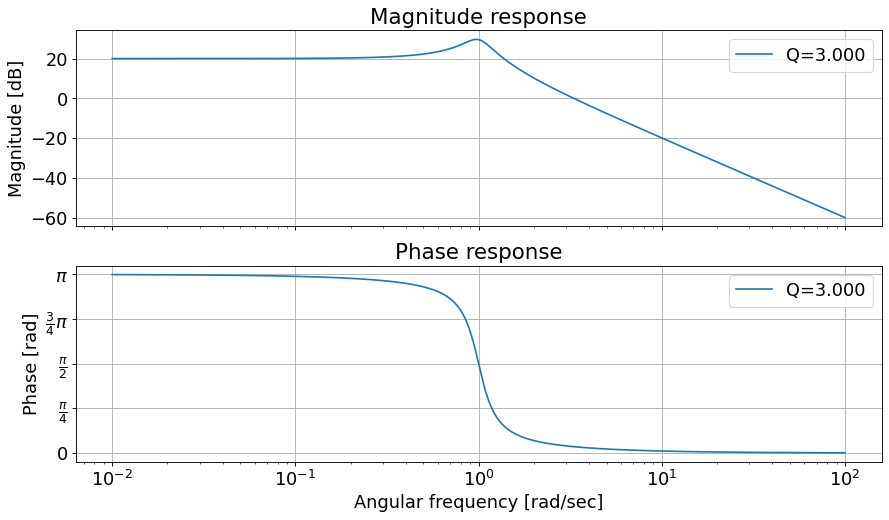

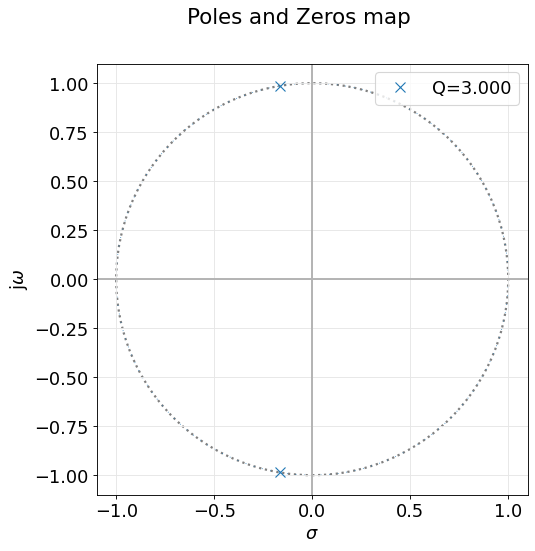

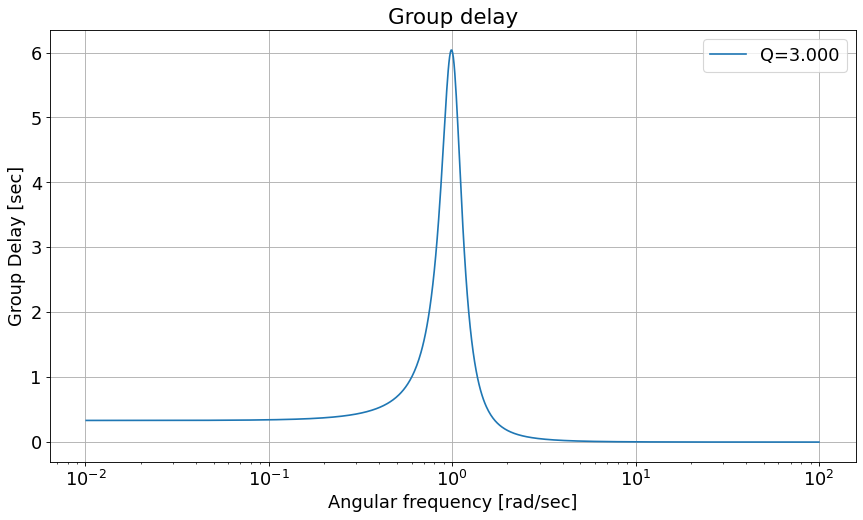

In [6]:
# Codigo asociado a un filtro Pasa-Bajo con Q = 3 y W0 = 1

from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

K = -10
w0 = 1
qq = 3

my_tf = TransferFunction( [K*(w0**2)], [1, w0/qq, w0**2] )

bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq) )

pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq)) #S plane pole/zero plot

GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq))

###  Analisis de graficos

En el $primer$ $grafico$ se observa el modulo y fase del filtro $pasa-bajos$ analizado previamente en el pdf. Este fue simulado en Python para poder ver la respuesta en frecuencia.

Lo que se observa primero es el modulo de la funsion transferencia del circuito. Se observa directamente que durante el primer rango de frecuencias, el filtro gana 20 dB, es decir, 10 veces (La entrada aumenta 10 veces en amplitud. Esto se observa en la salida). Despues de este periodo constante, aparece el sobrepico de este filtro y a partir de ahi empieza a disminuir el modulo de T(s), logrando atenuar en frecuencias altas (un digno comportamiento de un filtro pasa-bajos). Cabe destacar la ganancia del filtro, ya que al ser un $circuito$ $activo$, este tiende a ganar. A diferencia de los circuitos pasivos, los cuales no ganan. El filtro $pasa-bajo$ de un $RLC$, gana 1 (0 dB). Estos valores se pueden calcular a partir de esta transferencia:

$$ T(s) = \frac{V_2}{V_1} = \frac{-K.\omega_0}{s^2 + s. \frac{\omega_0}{Q} + \omega_0^2} $$

$Donde:$

* $K = 10.$
* $\omega_0 = 1$ y $Q = 3$.

Si reemplazamos $s$ por $j\omega$ y a su vez, analizamos que pasa en continua con el modulo, observaremos que la funcion dara como resultado K, osea 10, pero esto no termina aca. Si observamos la fase, esta empieza en $\pi$. Esto sucede simplemente por el hecho de tener un menos en la transferencia (Siempre y cuando estemos analizando este caso). Ademas, se puede observar, como en $\omega_0$ pasa por $\frac{\pi}{2}$.

En el $segundo$ $grafico$ se observa el diagrama de $polos$ y $ceros$. Esto tambien se puede verificar mediante el polinimio del denominador de la transferencia e igualando a 0, es decir:

$${s^2 + s. \frac{\omega_0}{Q} + \omega_0^2} = 0$$


Si haces el desarrollo y calculas las $raices$ (usando los valores anteriores), te queda: 

$${S_{1,2} = -\frac{1}{6} \pm J \frac{\sqrt{35}}{6}} = 0$$

Estas raices son $complejas$ $conjugadas$, lo cual nos lleva a un analisis importante. El $Q$ de este filtro es de 3, el cual es bastante grande. Esto nos indica que tan cerca estan las singularidades (polos) del eje $j\omega$. Esto se puede observar en el diagrama de $polos$ y $ceros$. Cuanto mas grande sea $Q$, los polos estaran cada vez mas cerca.


## Circuito LTspice

<img src="./Circuito_2.PNG" align="middle" width="1000" /> 

## Respuesta en frecuencia LTspice

<img src="./Respuesta_frecuencia_2.PNG" align="middle" width="1100" /> 

El $pico$ $maximo$ se encuentra aproximadamente en $152,84 mHz$. En este valor de frecuencia, el modulo es de $29,64dB$. Esto es importante señalarlo, ya que con los graficos de $Python$, no se vio. El modulo y la fase son iguales en forma a los graficos vistos en Python, no asi los valores. Se ve claramente como en 1 Hz no tenemos $\frac{\pi}{2}$, pero esto se debe a que LTspice grafica, ganancia en funcion de $f$ y no de $\omega$. Para ver donde esta la $f$ asociada a $\omega = 1$, tenemos que calcularla. 

- Partiendo de:

$$\omega = 2 \pi f$$

- Despejamos $f$:

$$f =\frac{\omega}{2 \pi}$$

- Calculamos $f$ para $\omega = 1$:

$$f = \frac{1}{2 \pi}Hz$$

$\quad$
$$f \approx 0,159[Hz] = 159,15.10^{-3}Hz$$

Este valor esta cerca del $maximo$ sin serlo, lo cual es logico, en $\omega_0$ no se encuentra el maximo. Este resultado es muy parecido al visto en el grafico de LTspice, pero siendo un poco mayor. Por el lado de la fase, se ve como masomenos llega a la mitad de la misma.

Para encontrar la frecuencia asociada con el maximo de ganancia (sobrepico), se debe derivar el modulo de la transferencia en funcion de $\omega$  e igualar a 0. En el caso de hacer esto, se llega a que $\omega = 1 - \frac{1}{2Q^2}$, siendo $Q = 3$

- Calculamos $\omega$:

$$\omega = (1 - \frac{1}{2.3^2}) s^{-1}$$
$\quad$
$$\omega = (1 - \frac{1}{18})s^{-1}$$
$\quad$
$$\omega = \frac{17}{18}s^{-1}$$
$\quad$
$$\omega \approx 944,44.10^{-3}s^{-1} $$

- Entonces para calcular $f$ hacemos $f =\frac{\omega}{2 \pi}$:

$$f =\frac{944,44ms^{-1}}{2 \pi}Hz$$
$\quad$
$$f \approx 0,15031 [Hz]= 150,31.10^{-3}Hz$$

Este resultado es muy parecido al medido en LTspice.

## Conclusion

Este filtro tiene un sobrepico debido a los polos complejos conjugados que tiene la transferencia. Este mismo tiene una f que es distinta a la f asociada a $\omega = 1$. A pesar de la diferencia, se podria decir que son iguales las dos. Por lo tanto podriamos decir que hay un maximo en $\omega = 1$.

Los dos graficos dieron parecidos, teniendo en cuenta que uno esta medido sobe frecuencia y no sobra la angular, lo cual nos da un cambio en los valores.